# Importing Required Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud

# Loading Dataset

In [26]:
df = pd.read_csv(".\\emails.csv")
print(f"Dataset loaded to dataframe df having dimensions {df.shape}")

Dataset loaded to dataframe df having dimensions (5172, 3002)


# Exploring Dataset

## Dimensions And Size

In [28]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}\nTotal No. of Cells : {df.size}")

No. of Rows : 5172
No. of Columns : 3002
Total No. of Cells : 15526344


## Displaying Sample Rows

In [29]:
print("Top 5 rows")
display(df.head())

Top 5 rows


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [30]:
print("Last 5 rows")
display(df.tail())

Last 5 rows


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [31]:
print("Randomly selected 5 rows")
display(df.sample(5))

Randomly selected 5 rows


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
4890,Email 4891,5,3,2,3,1,4,39,0,3,...,0,0,0,0,0,0,0,0,0,1
4390,Email 4391,27,8,10,9,7,3,125,2,3,...,0,0,0,0,0,0,0,1,0,0
2759,Email 2760,0,1,1,0,1,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2978,Email 2979,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
568,Email 569,2,3,1,1,0,1,43,0,0,...,0,0,0,0,0,0,0,1,0,1


## Metadata

In [32]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


None

## Statistical Summary

In [33]:
display(df.describe())

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# Data Preprocessing

## Handling NULL Values

In [34]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
Total NULL Values : 0


## Handling Target Column

In [35]:
y = df['Prediction'].values
print("Target variable extracted and stored")
print(f"Target distribution: {np.unique(y, return_counts=True)}")

Target variable extracted and stored
Target distribution: (array([0, 1], dtype=int64), array([3672, 1500], dtype=int64))


## Dropping Irrelevant Features

In [36]:
df = df.drop("Email No.", axis=1)

In [37]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


## Checking Target Distribution

In [38]:
print(f"\nTarget variable distribution:")
unique, counts = np.unique(y, return_counts=True)
for i, (val, count) in enumerate(zip(unique, counts)):
    print(f"Class {val}: {count} ({count/len(y)*100:.1f}%)")


Target variable distribution:
Class 0: 3672 (71.0%)
Class 1: 1500 (29.0%)


# Data Preparation

## Feature Target Split

In [39]:
X = df.drop("Prediction", axis=1)
y = df["Prediction"]

## Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dimensionality Reduction

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)  # reduce to top 500 components
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# EDA

## Class Distribution

In [43]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

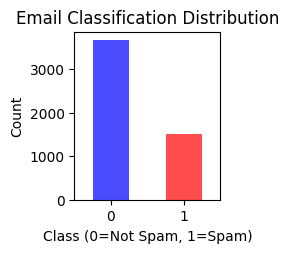

In [44]:
plt.subplot(2, 3, 1)
pd.Series(df['Prediction']).value_counts().plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Email Classification Distribution')
plt.xlabel('Class (0=Not Spam, 1=Spam)')
plt.ylabel('Count')
plt.xticks(rotation=0)

## Word Cloud Visualization for Spam vs Not Spam

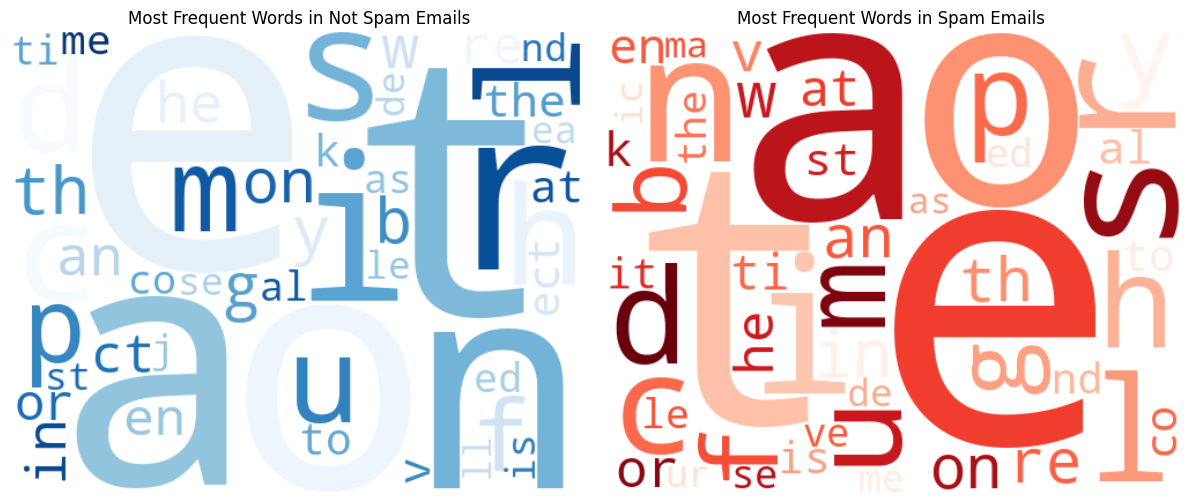

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd

# Convert features to numeric (if not already)
X_numeric = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce').fillna(0).values
feature_names = X.columns.tolist()

# --- Not Spam (label = 0) ---
not_spam_data = X_numeric[y == 0]
not_spam_avg = np.mean(not_spam_data, axis=0)

word_freq_not_spam = {feature_names[i]: not_spam_avg[i] 
                      for i in range(len(feature_names)) if not_spam_avg[i] > 0}

# --- Spam (label = 1) ---
spam_data = X_numeric[y == 1]
spam_avg = np.mean(spam_data, axis=0)

word_freq_spam = {feature_names[i]: spam_avg[i] 
                  for i in range(len(feature_names)) if spam_avg[i] > 0}

# --- Plot Word Clouds ---
plt.figure(figsize=(12, 6))

# Not Spam
plt.subplot(1, 2, 1)
if word_freq_not_spam:
    wordcloud_not_spam = WordCloud(width=500, height=400, background_color='white',
                                   max_words=50, colormap='Blues').generate_from_frequencies(word_freq_not_spam)
    plt.imshow(wordcloud_not_spam, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words in Not Spam Emails')
else:
    plt.text(0.5, 0.5, 'No data available', ha='center', va='center')
    plt.axis('off')

# Spam
plt.subplot(1, 2, 2)
if word_freq_spam:
    wordcloud_spam = WordCloud(width=500, height=400, background_color='white',
                               max_words=50, colormap='Reds').generate_from_frequencies(word_freq_spam)
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words in Spam Emails')
else:
    plt.text(0.5, 0.5, 'No data available', ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Top Spam Indicators

In [45]:
spam_indicators = []
for i, word in enumerate(feature_names):
    spam_freq = spam_avg[i]
    not_spam_freq = not_spam_avg[i]
    if spam_freq > not_spam_freq and spam_freq > 0:
        ratio = spam_freq / (not_spam_freq + 0.001)  # Add small value to avoid division by zero
        spam_indicators.append((word, ratio, spam_freq))

if spam_indicators:
    spam_indicators.sort(key=lambda x: x[1], reverse=True)
    print(f"\nTOP 10 SPAM INDICATOR WORDS (higher frequency in spam):")
    for i, (word, ratio, freq) in enumerate(spam_indicators[:10], 1):
        print(f"{i:2d}. {word:<15} (spam/not-spam ratio: {ratio:.2f})")

print(f"\nWord-based EDA completed successfully!")


TOP 10 SPAM INDICATOR WORDS (higher frequency in spam):
 1. nbsp            (spam/not-spam ratio: 323.33)
 2. font            (spam/not-spam ratio: 227.81)
 3. pills           (spam/not-spam ratio: 210.67)
 4. computron       (spam/not-spam ratio: 161.33)
 5. viagra          (spam/not-spam ratio: 130.67)
 6. href            (spam/not-spam ratio: 126.67)
 7. img             (spam/not-spam ratio: 118.67)
 8. height          (spam/not-spam ratio: 117.10)
 9. src             (spam/not-spam ratio: 108.67)
10. drug            (spam/not-spam ratio: 108.00)

Word-based EDA completed successfully!


# Feature Engineering

## Feature Selection using Variance Threshold

In [46]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)

# Model Training

## KNN Training

In [47]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [51]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_knn = GridSearchCV(estimator=knn, 
                        param_grid=param_grid_knn, 
                        cv=5, 
                        scoring='accuracy', 
                        n_jobs=-1)

grid_knn.fit(X_train, y_train)

# Get best estimator
best_knn = grid_knn.best_estimator_

print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best Cross-Validation Accuracy:", grid_knn.best_score_)

Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9195108914708303


## SVM Training

In [48]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [53]:
# GridSearch for SVM
svm = SVC()
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Best Model
best_svm = grid_svm.best_estimator_

print("🔹 Best SVM Parameters:", grid_svm.best_params_)
print("🔹 Best SVM CV Accuracy:", grid_svm.best_score_)

🔹 Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
🔹 Best SVM CV Accuracy: 0.9557629286928483


# Model Evaluation

## Making Predictions

In [56]:
print("Making predictions on test set...")
# Use the trained best estimators
y_pred_knn = best_knn.predict(X_test)
y_pred_svm = best_svm.predict(X_test)

Making predictions on test set...


## Evaluation

In [58]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"{'='*40}")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    return accuracy, precision, recall, f1

In [59]:
knn_metrics = evaluate_model(y_test, y_pred_knn, "K-NEAREST NEIGHBORS (KNN)")
svm_metrics = evaluate_model(y_test, y_pred_svm, "SUPPORT VECTOR MACHINE (SVM)")


K-NEAREST NEIGHBORS (KNN) Performance:
Accuracy:  0.9198 (91.98%)
Precision: 0.8127
Recall:    0.9400
F1-Score:  0.8717

SUPPORT VECTOR MACHINE (SVM) Performance:
Accuracy:  0.9594 (95.94%)
Precision: 0.9479
Recall:    0.9100
F1-Score:  0.9286


## Confusion Matrix

In [60]:
fig = plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

In [61]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
svm_cm = confusion_matrix(y_test, y_pred_svm)

### Confusion Matrix for KNN

Text(0.5, 225.12222222222223, 'Predicted Class')

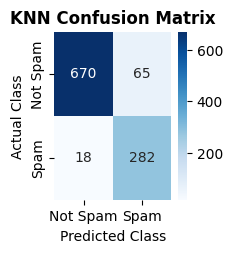

In [62]:
plt.subplot(2, 3, 1)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.title('KNN Confusion Matrix', fontsize=12, fontweight='bold')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

### Confusion Matrix for SVM

Text(0.5, 225.12222222222223, 'Predicted Class')

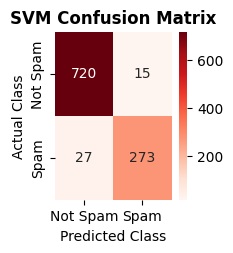

In [63]:
plt.subplot(2, 3, 2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.title('SVM Confusion Matrix', fontsize=12, fontweight='bold')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# Model Performance Comparison

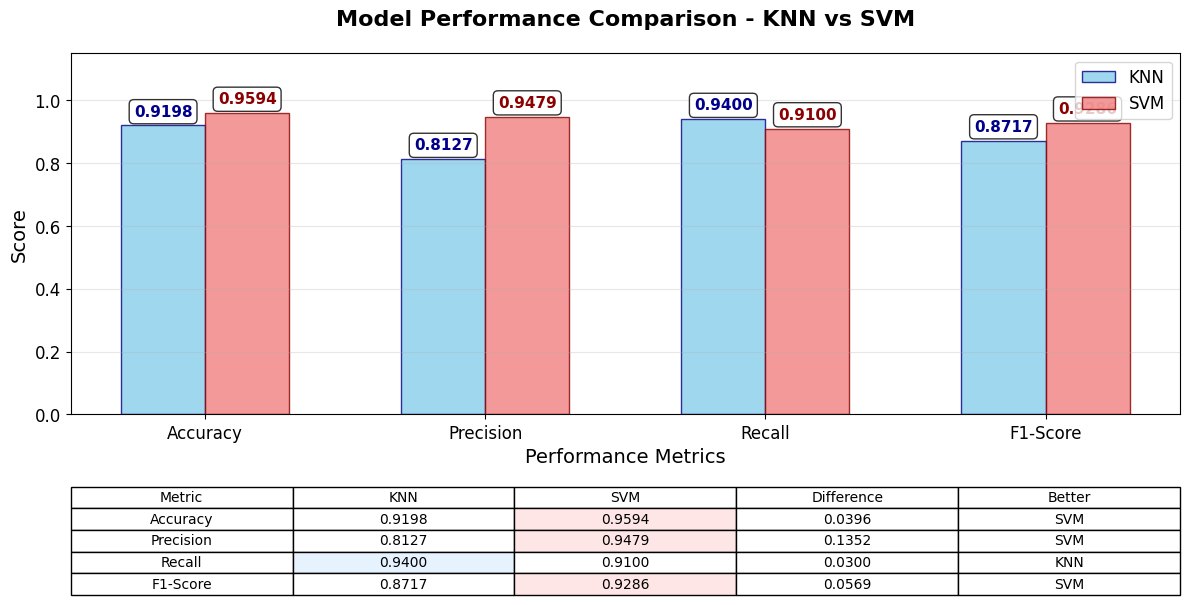

In [64]:
# Create a separate figure just for performance comparison with better visibility
plt.figure(figsize=(12, 6))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = list(knn_metrics)
svm_scores = list(svm_metrics)

x_pos = np.arange(len(metrics_names))
width = 0.3

# Create the bars
bars1 = plt.bar(x_pos - width/2, knn_scores, width, label='KNN', 
                color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1)
bars2 = plt.bar(x_pos + width/2, svm_scores, width, label='SVM', 
                color='lightcoral', alpha=0.8, edgecolor='darkred', linewidth=1)

# Customize the plot
plt.xlabel('Performance Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Performance Comparison - KNN vs SVM', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x_pos, metrics_names, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1.15)  # More space for labels

# Add value labels on bars with better visibility
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    # KNN labels
    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.02,
             f'{height1:.4f}', ha='center', va='bottom', fontsize=11, 
             fontweight='bold', color='darkblue',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    # SVM labels  
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.02,
             f'{height2:.4f}', ha='center', va='bottom', fontsize=11, 
             fontweight='bold', color='darkred',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Add a table below the chart
table_data = []
for i, metric in enumerate(metrics_names):
    diff = abs(knn_scores[i] - svm_scores[i])
    better = 'KNN' if knn_scores[i] > svm_scores[i] else 'SVM'
    table_data.append([metric, f'{knn_scores[i]:.4f}', f'{svm_scores[i]:.4f}', f'{diff:.4f}', better])

table = plt.table(cellText=table_data,
                  colLabels=['Metric', 'KNN', 'SVM', 'Difference', 'Better'],
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0, -0.5, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table
for i in range(len(metrics_names)):
    if table_data[i][4] == 'KNN': 
        table[(i+1, 1)].set_facecolor('#E6F3FF')  # Light blue
    else:  # SVM is better
        table[(i+1, 2)].set_facecolor('#FFE6E6')  # Light red

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Make room for the table
plt.show()